In [1]:
# 數據讀取
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料------>y 分類0-9,X 28*28的圖
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
x_train[:1] #<-----------------------三維

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [3]:

x_train[:3].shape #<----------學會怎樣扁平

(3, 28, 28)

In [4]:
# 數據解釋 X 就是影像被轉換成扁平的一階張量
# 提示
x_train[:3].reshape(3, 784).shape

(3, 784)

In [5]:
# 數據解釋 y
y_train[:3]

array([5, 0, 4], dtype=uint8)

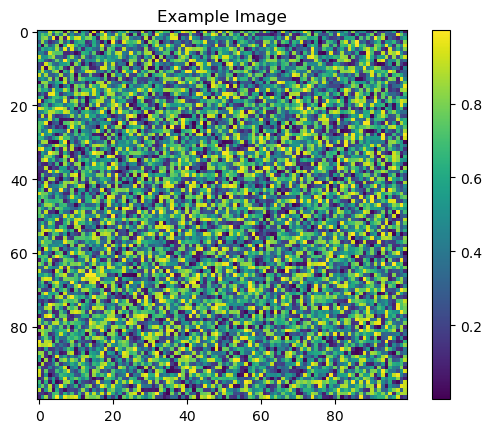

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个示例图像数据（二维数组，可以是灰度图像或彩色图像数据）
image_data = np.random.random((100, 100))  # 生成一个随机的 100x100 矩阵

# 显示图像
plt.imshow(image_data, cmap='viridis')  # cmap 参数指定了颜色映射，这里使用 'viridis'
plt.colorbar()  # 添加颜色条，用于显示颜色与数据值的对应关系
plt.title('Example Image')  # 设置图像标题
plt.show()  # 显示图像

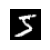

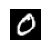

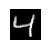

In [7]:
# 數據解釋
import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(0.4, 0.4))
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.show()


In [8]:
# 數據解釋
from keras.utils import to_categorical
X = x_train
y = y_train.reshape(-1, 1)
y = to_categorical(y).astype('int') # 因為輸出的時候分成 [0, 1] 對應機率
y_train[:3], y[:3]

(array([5, 0, 4], dtype=uint8),
 array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]))

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


# 分割数据为特征 (X) 和标签 (y)
X = x_train.reshape(x_train.shape[0], 784) #<-----------------------------------注意現在X=28,28, X=784
y = y_train.reshape(-1, 1) #<---------------------------------------------------轉成二維
y = to_categorical(y).astype('int') # 因為輸出的時候分成 [0..9] 對應機率
## ANN = DNN , CNN, RNN,
# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 Sequential 模型
model = keras.Sequential()

# 添加输入层
model.add(layers.Input(shape=(X_train.shape[1],)))

# 添加隐藏层
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# 添加输出层
model.add(layers.Dense(10, activation='softmax'))  # 10分类问题，使用 softmax 激活函数

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# 训练模型
history = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose = 2, validation_data=(X_test, y_test))

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'测试集上的损失：{loss}')
print(f'测试集上的准确率：{accuracy}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3000/3000 - 5s - loss: 0.2644 - accuracy: 0.9226 - val_loss: 0.1659 - val_accuracy: 0.9532 - 5s/epoch - 2ms/step
Epoch 2/10
3000/3000 - 4s - loss: 0.1290 - accuracy: 0.9607 - val_loss: 0.1427 - val_accuracy: 0.9600 - 4s/epoch - 1ms/step
Epoch 3/10
3000/3000 - 4s - loss: 

In [10]:
print(history.history.keys())
history.history['accuracy'][:3]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.9226041436195374, 0.9606666564941406, 0.9703958630561829]

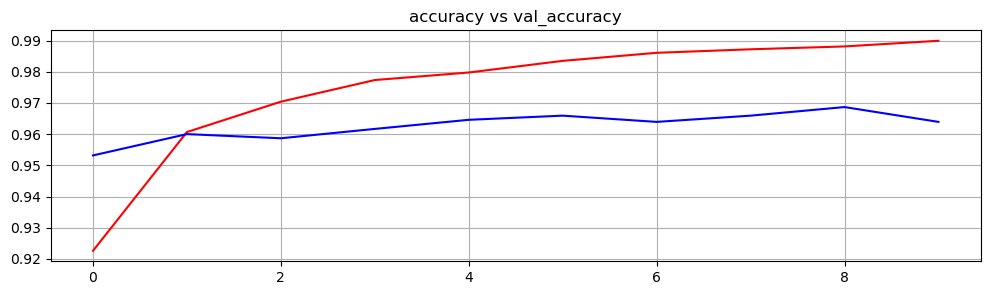

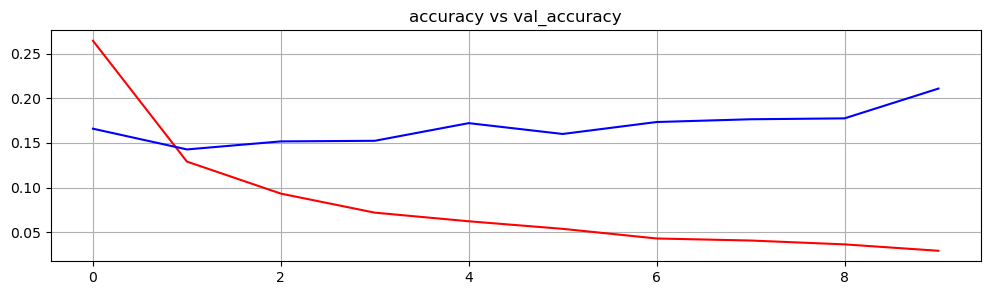

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.title('accuracy vs val_accuracy')
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.grid()
plt.title('accuracy vs val_accuracy')
plt.show()

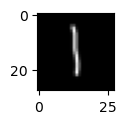

(28, 28)
1/1 [==============================] - 0s 81ms/step
8


In [12]:
# 怎樣辨識自己寫的數字
import matplotlib.pyplot as plt
from skimage import util
from skimage import data, color
from skimage.transform import resize
plt.figure(figsize=(1, 1))
test = util.invert(resize( color.rgb2gray(plt.imread('./1.png')[:, :, :3]), (28, 28)  ,
                   anti_aliasing=True)) # 注意 黑底 白底問題(util.invert( ))
plt.imshow(test, cmap='gray')
plt.show()
print(test.shape)
print(np.argmax(model.predict(test.reshape(1, 784))))

In [13]:
model.save('./model.keras')

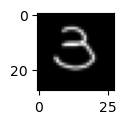

(28, 28)
1/1 [==============================] - 0s 62ms/step
8


In [15]:
# 驗證儲存的MODEL
from keras.models import load_model
# 怎樣辨識自己寫的數字
import matplotlib.pyplot as plt
from skimage import util
from skimage import data, color
from skimage.transform import resize


model2 = keras.models.load_model('model.keras')

plt.figure(figsize=(1, 1))
test = util.invert(resize( color.rgb2gray(plt.imread('./3.png')[:, :, :3]), (28, 28)  ,
                   anti_aliasing=True)) # 注意 黑底 白底問題
plt.imshow(test, cmap='gray')
plt.show()
print(test.shape)
print(np.argmax(model2.predict(test.reshape(1, 784))))